In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

## Importing custom functions from different folder:

In [5]:
# Get the current directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder = 'Implementation'
data_folder = os.path.join(parent_dir, folder)

# Construct the full file path
file_ = 'utils_data'
full_path = os.path.join(data_folder, file_)
print(full_path)
print(data_folder)
sys.path.append(data_folder)  

# Load the functions from .py file  
try:
    from utils_data_multiple import load_multiple_data, plot_multiple_data, point_to_segment, cleaning_clustering_multiple_data
    from utils_data_multiple import plot_data, experimental_velocity, linear_transf 
    from utils_data_multiple import saving_processed_mult_data, load_processed_mult_data, get_cluster_data, get_cluster_idxrule   
    from utils_data import plot_velocity
    from utils_model import numericalSimulation, ComputeFunctional, ComputeVel
    from utils_model import generate_trajectory, plot_simulation, generate_trajectory_vel, optimize_Sigma, plot_multiple_trajectories, plotting_params
except ModuleNotFoundError as e:
    print("ModuleNotFoundError:", e)

/Users/flaviaferrusmarimon/UB/MAM/TFM/Codes1/MotorControlPrediction/Implementation/utils_data
/Users/flaviaferrusmarimon/UB/MAM/TFM/Codes1/MotorControlPrediction/Implementation


## Loading multiple subjects data

Motivation may be: 
- 0: playing alone
- 1: easy rival
- 2: hard rival 

The data is now clustered by motivation level, i.e. `dataTrajecetories-25-M1-C1`. We are also splitting the dataset depending on the playing modes: passing through and stopping. For each dataset moreover we have the four different trajectories.

The data is normalized, clustered in terms of motivation, playing mode and ordered by trajectory. 

We seek to find a paramater fitting for each subject, motivational state and playing mode, and trajectory. Then we can consider the mean for each case to fit the model for each subject and motivational state. 

We consider the mass to be the same at the begining of the movement, hence we are studying 3 motivational states x 2 playing modes parameters per player. 

We have 4 possible trajectories (the playing modes just modify the control function, since the effort is different). 

### Loading data: 

##### Loading raw data in case we want to conduct the whole processing: 

In [3]:
data_dict = load_multiple_data(first_subj = 25, last_subj = 37, 
                       file_names = 'dataTrajectories' )

In [4]:
print('The length of the experimental data we have:', len(data_dict))
print('The keys of the data: ', data_dict.keys())
print('The length of each dataset:', type(data_dict['dfx_26_11']), data_dict['dfx_26_11'].shape)

The length of the experimental data we have: 144
The keys of the data:  dict_keys(['dfx_25_11', 'dfy_25_11', 'dfx_25_12', 'dfy_25_12', 'dfx_25_21', 'dfy_25_21', 'dfx_25_22', 'dfy_25_22', 'dfx_25_31', 'dfy_25_31', 'dfx_25_32', 'dfy_25_32', 'dfx_26_11', 'dfy_26_11', 'dfx_26_12', 'dfy_26_12', 'dfx_26_21', 'dfy_26_21', 'dfx_26_22', 'dfy_26_22', 'dfx_26_31', 'dfy_26_31', 'dfx_26_32', 'dfy_26_32', 'dfx_27_11', 'dfy_27_11', 'dfx_27_12', 'dfy_27_12', 'dfx_27_21', 'dfy_27_21', 'dfx_27_22', 'dfy_27_22', 'dfx_27_31', 'dfy_27_31', 'dfx_27_32', 'dfy_27_32', 'dfx_28_11', 'dfy_28_11', 'dfx_28_12', 'dfy_28_12', 'dfx_28_21', 'dfy_28_21', 'dfx_28_22', 'dfy_28_22', 'dfx_28_31', 'dfy_28_31', 'dfx_28_32', 'dfy_28_32', 'dfx_29_11', 'dfy_29_11', 'dfx_29_12', 'dfy_29_12', 'dfx_29_21', 'dfy_29_21', 'dfx_29_22', 'dfy_29_22', 'dfx_29_31', 'dfy_29_31', 'dfx_29_32', 'dfy_29_32', 'dfx_30_11', 'dfy_30_11', 'dfx_30_12', 'dfy_30_12', 'dfx_30_21', 'dfy_30_21', 'dfx_30_22', 'dfy_30_22', 'dfx_30_31', 'dfy_30_31', 'dfx_30

In [ ]:
plot_multiple_data(data_dict)

In [5]:
cluster_points = [
        (10.5, 4.85),   # pt2
        (-11, -5),       # pt3  
        (10.5, 0),      # pt1    
        (-10.5, 1.25)  # pt0
    ]
n_clusters = 4

segments = point_to_segment(cluster_points, n_clusters)


In [16]:
print('List with al the target segments:', segments)
print('List with the two points of segment for cluster 0:', segments[0])
print('Array with point target 1 for cluster 0:', segments[0][0])
print('First coordinate of point target 1 for cluster 0:', segments[0][0][0])

List with al the target segments: [((9.5, 6.6), (11.5, 3.0999999999999996)), ((-10, -6.75), (-12, -3.25)), ((11.5, 1.75), (9.5, -1.75)), ((-11.5, -0.5), (-9.5, 3.0))]
List with the two points of segment for cluster 0: ((9.5, 6.6), (11.5, 3.0999999999999996))
Array with point target 1 for cluster 0: (9.5, 6.6)
First coordinate of point target 1 for cluster 0: 9.5


In [6]:
cleaned_data_dict, idxrule_dict = cleaning_clustering_multiple_data(data_dict, 
                                    segments, 
                                    first_subj = 25, last_subj = 37,
                                    save_dir = 'subject_plots')



Dataset shape before cleaning:
(111, 2500)
Dataset shape before cleaning:
(105, 2500)
Dataset shape before cleaning:
(96, 2500)
Dataset shape before cleaning:
(129, 2500)
Dataset shape before cleaning:
(107, 2500)
Dataset shape before cleaning:
(142, 2500)
Dataset shape before cleaning:
(146, 2500)
Dataset shape before cleaning:
(138, 2500)
Dataset shape before cleaning:
(139, 2500)
Dataset shape before cleaning:
(71, 2500)
Dataset shape before cleaning:
(140, 2500)
Dataset shape before cleaning:
(170, 2500)
Dataset shape before cleaning:
(170, 2500)
Dataset shape before cleaning:
(165, 2500)
Dataset shape before cleaning:
(181, 2500)
Dataset shape before cleaning:
(178, 2500)
Dataset shape before cleaning:
(171, 2500)
Dataset shape before cleaning:
(179, 2500)
Dataset shape before cleaning:
(134, 2500)
Dataset shape before cleaning:
(115, 2500)
Dataset shape before cleaning:
(119, 2500)
Dataset shape before cleaning:
(135, 2500)
Dataset shape before cleaning:
(126, 2500)
Dataset shape

In [11]:
print(type(cleaned_data_dict))
print(cleaned_data_dict.keys())
print(type(cleaned_data_dict[25]))
print(cleaned_data_dict[25].keys())


<class 'dict'>
dict_keys([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
<class 'dict'>
dict_keys(['dfx_25_11_cluster_0', 'dfy_25_11_cluster_0', 'dfx_25_11_cluster_1', 'dfy_25_11_cluster_1', 'dfx_25_11_cluster_2', 'dfy_25_11_cluster_2', 'dfx_25_11_cluster_3', 'dfy_25_11_cluster_3', 'dfx_25_12_cluster_0', 'dfy_25_12_cluster_0', 'dfx_25_12_cluster_1', 'dfy_25_12_cluster_1', 'dfx_25_12_cluster_2', 'dfy_25_12_cluster_2', 'dfx_25_12_cluster_3', 'dfy_25_12_cluster_3', 'dfx_25_21_cluster_0', 'dfy_25_21_cluster_0', 'dfx_25_21_cluster_1', 'dfy_25_21_cluster_1', 'dfx_25_21_cluster_2', 'dfy_25_21_cluster_2', 'dfx_25_21_cluster_3', 'dfy_25_21_cluster_3', 'dfx_25_22_cluster_0', 'dfy_25_22_cluster_0', 'dfx_25_22_cluster_1', 'dfy_25_22_cluster_1', 'dfx_25_22_cluster_2', 'dfy_25_22_cluster_2', 'dfx_25_22_cluster_3', 'dfy_25_22_cluster_3', 'dfx_25_31_cluster_0', 'dfy_25_31_cluster_0', 'dfx_25_31_cluster_1', 'dfy_25_31_cluster_1', 'dfx_25_31_cluster_2', 'dfy_25_31_cluster_2', 'dfx_25_31_cluster_3', 'd

In [10]:
print(type(idxrule_dict))
print(idxrule_dict.keys())
print(type(idxrule_dict[25]))
print(idxrule_dict[25].keys())

<class 'dict'>
dict_keys([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
<class 'dict'>
dict_keys(['dfx_25_11_cluster_0', 'dfx_25_11_cluster_1', 'dfx_25_11_cluster_2', 'dfx_25_11_cluster_3', 'dfx_25_12_cluster_0', 'dfx_25_12_cluster_1', 'dfx_25_12_cluster_2', 'dfx_25_12_cluster_3', 'dfx_25_21_cluster_0', 'dfx_25_21_cluster_1', 'dfx_25_21_cluster_2', 'dfx_25_21_cluster_3', 'dfx_25_22_cluster_0', 'dfx_25_22_cluster_1', 'dfx_25_22_cluster_2', 'dfx_25_22_cluster_3', 'dfx_25_31_cluster_0', 'dfx_25_31_cluster_1', 'dfx_25_31_cluster_2', 'dfx_25_31_cluster_3', 'dfx_25_32_cluster_0', 'dfx_25_32_cluster_1', 'dfx_25_32_cluster_2', 'dfx_25_32_cluster_3'])


In [14]:
saving_processed_mult_data(idxrule_dict=idxrule_dict, folder_name='clustered_multiple_data')

Saving the cleaned data...
CSV and/or idxrule JSON files have been saved successfully.


In [ ]:
saving_processed_mult_data(cleaned_data_dict = cleaned_data_dict, 
                               folder_name = 'clustered_multiple_data')

In [137]:
scaled_data_dict, velocity_dict, results_dict = multiple_linear_transf_(cleaned_data_dict, idxrule_dict, 
                            segments, 
                            first_subj = 25, last_subj = 37,
                            n_clusters = 4,
                            saving = True, 
                            save_dir = 'subject_plots_2')

Rotating and scaling the trajectories for subject  25
Rotating and scaling the trajectories for subject  26
Rotating and scaling the trajectories for subject  27
Rotating and scaling the trajectories for subject  28
Rotating and scaling the trajectories for subject  29
Rotating and scaling the trajectories for subject  30
Rotating and scaling the trajectories for subject  31
Rotating and scaling the trajectories for subject  32
Rotating and scaling the trajectories for subject  33
Rotating and scaling the trajectories for subject  34
Rotating and scaling the trajectories for subject  35
Rotating and scaling the trajectories for subject  36


In [144]:
saving_processed_mult_data(cleaned_data_dict = scaled_data_dict, 
                               folder_name = 'scaled_data')

Saving the cleaned data...
CSV and/or idxrule JSON files have been saved successfully.


In [ ]:
saving_processed_mult_data(cleaned_data_dict = velocity_dict, 
                               folder_name = 'velocity')

In [143]:
saving_processed_mult_data(idxrule_dict = results_dict, 
                               folder_name = 'scaled_multiple_data')

Saving the cleaned data...
CSV and/or idxrule JSON files have been saved successfully.


##### Plotting the loaded data for each subject

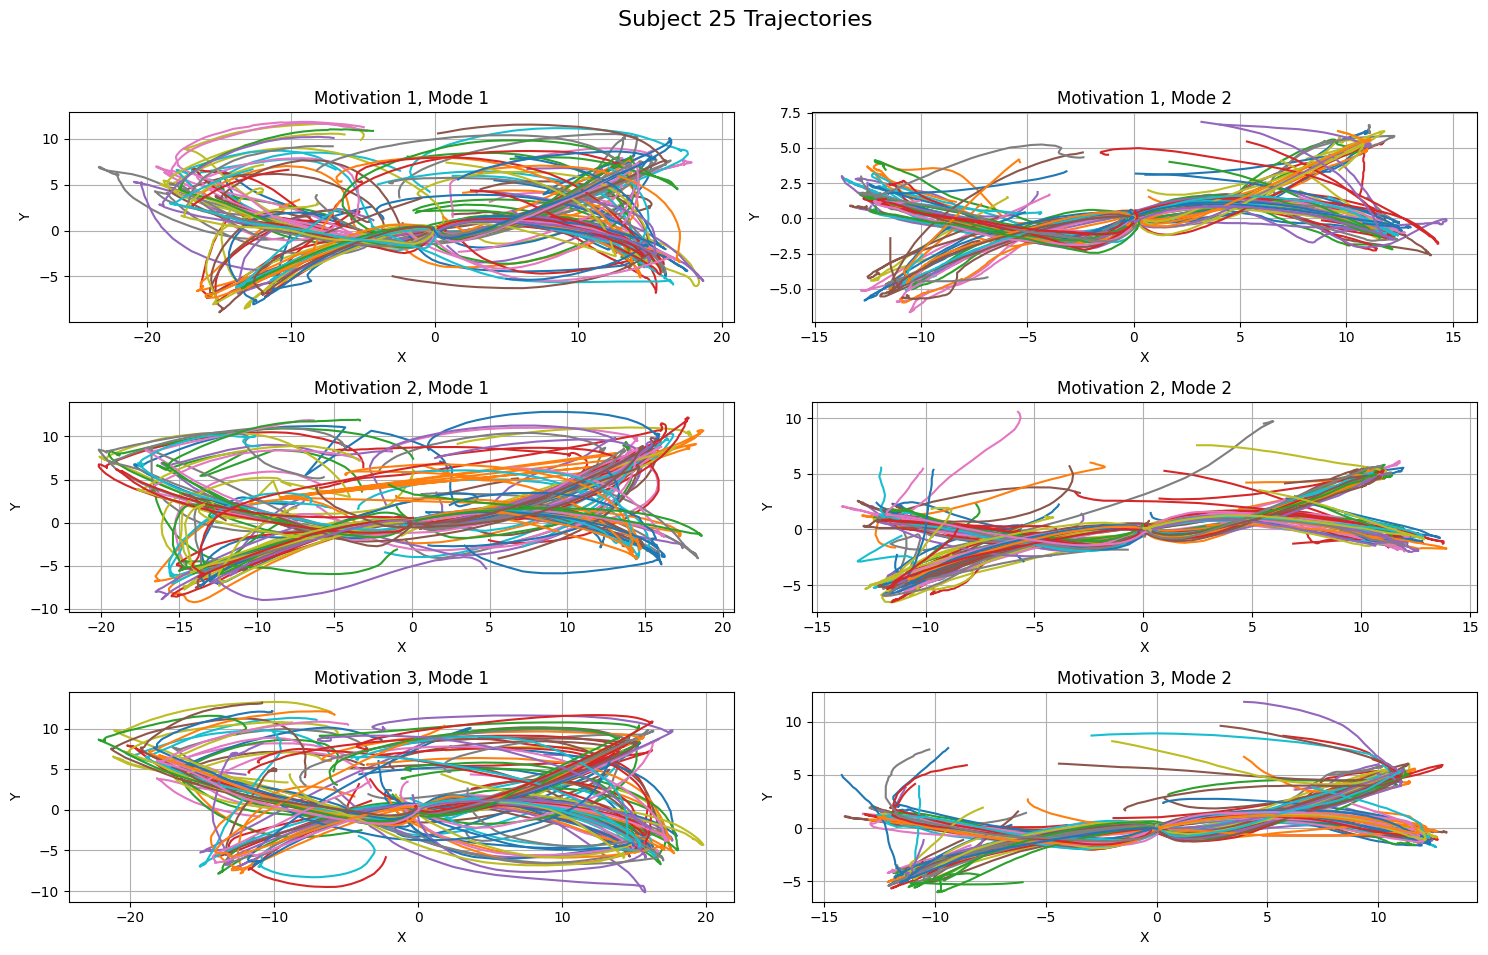

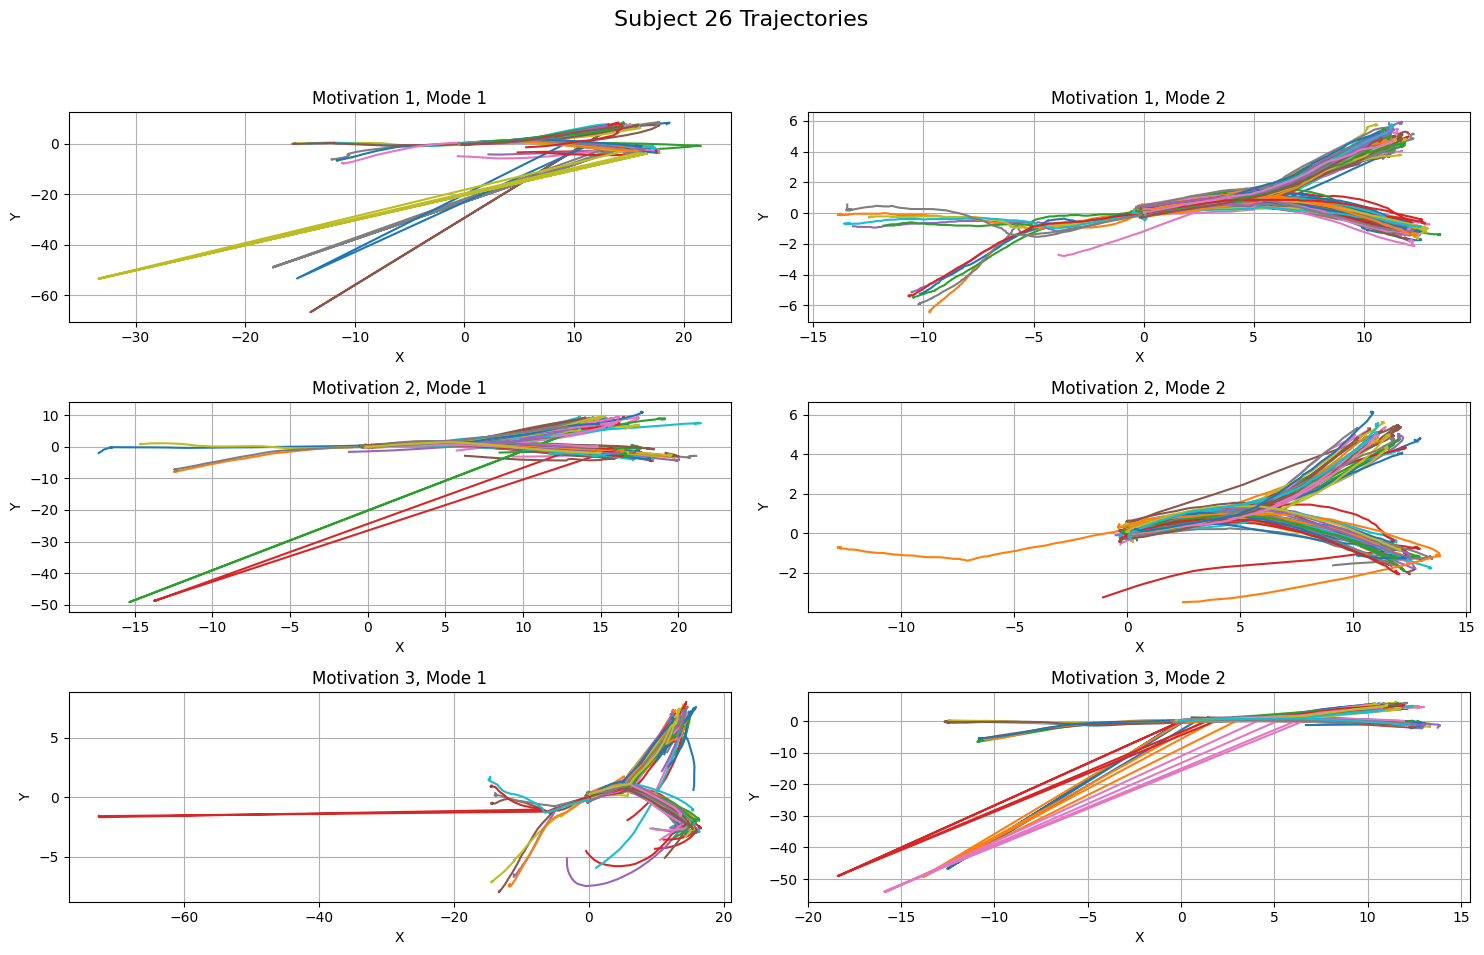

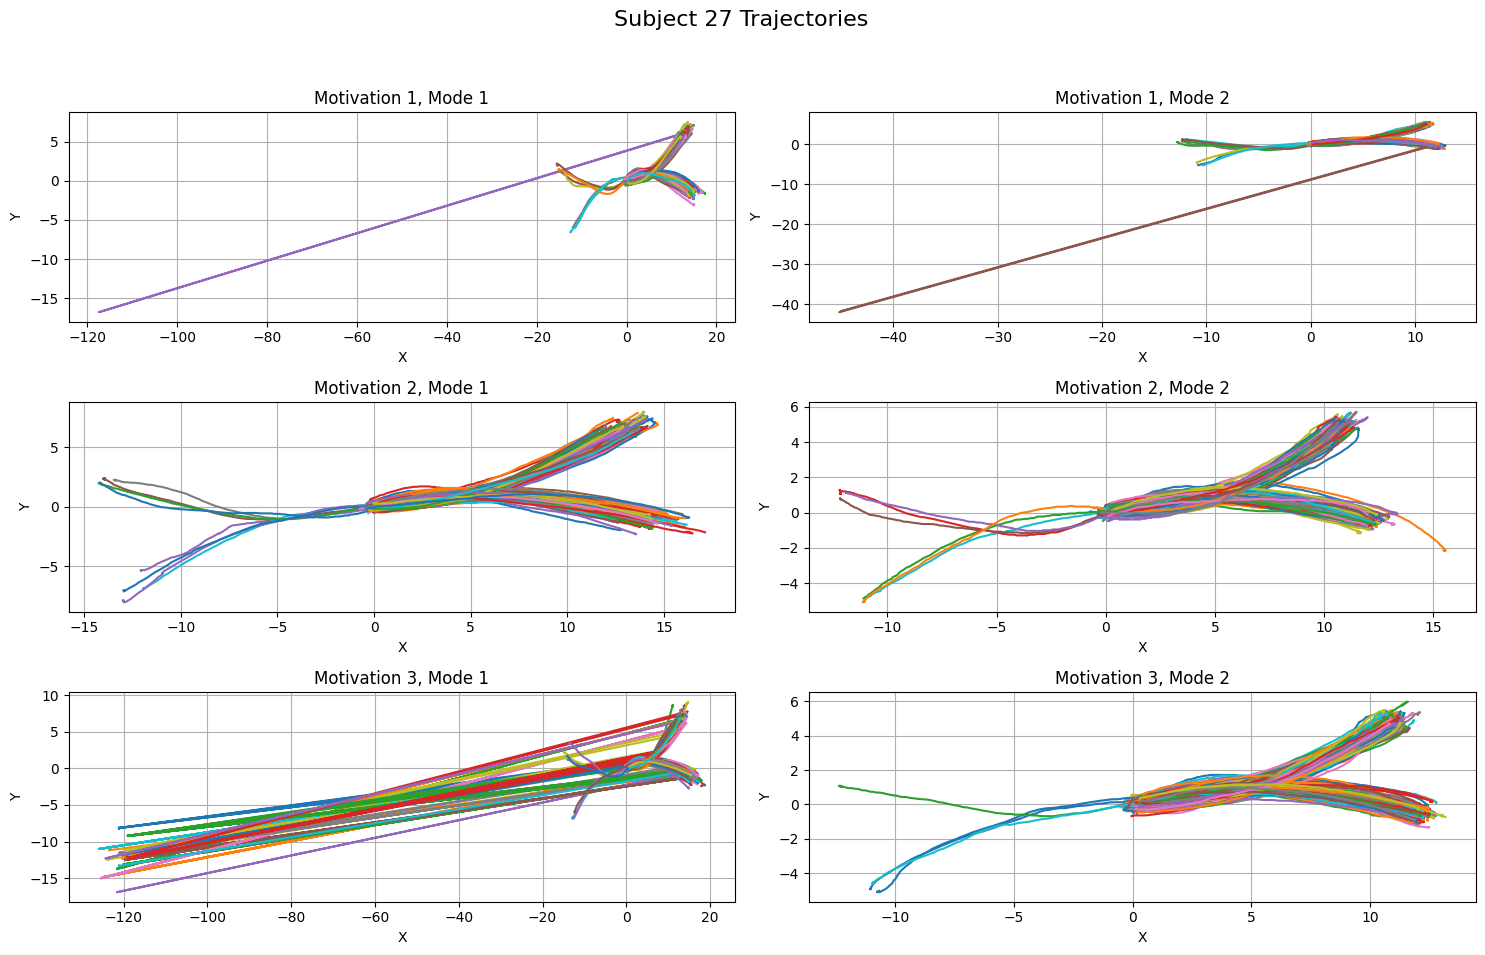

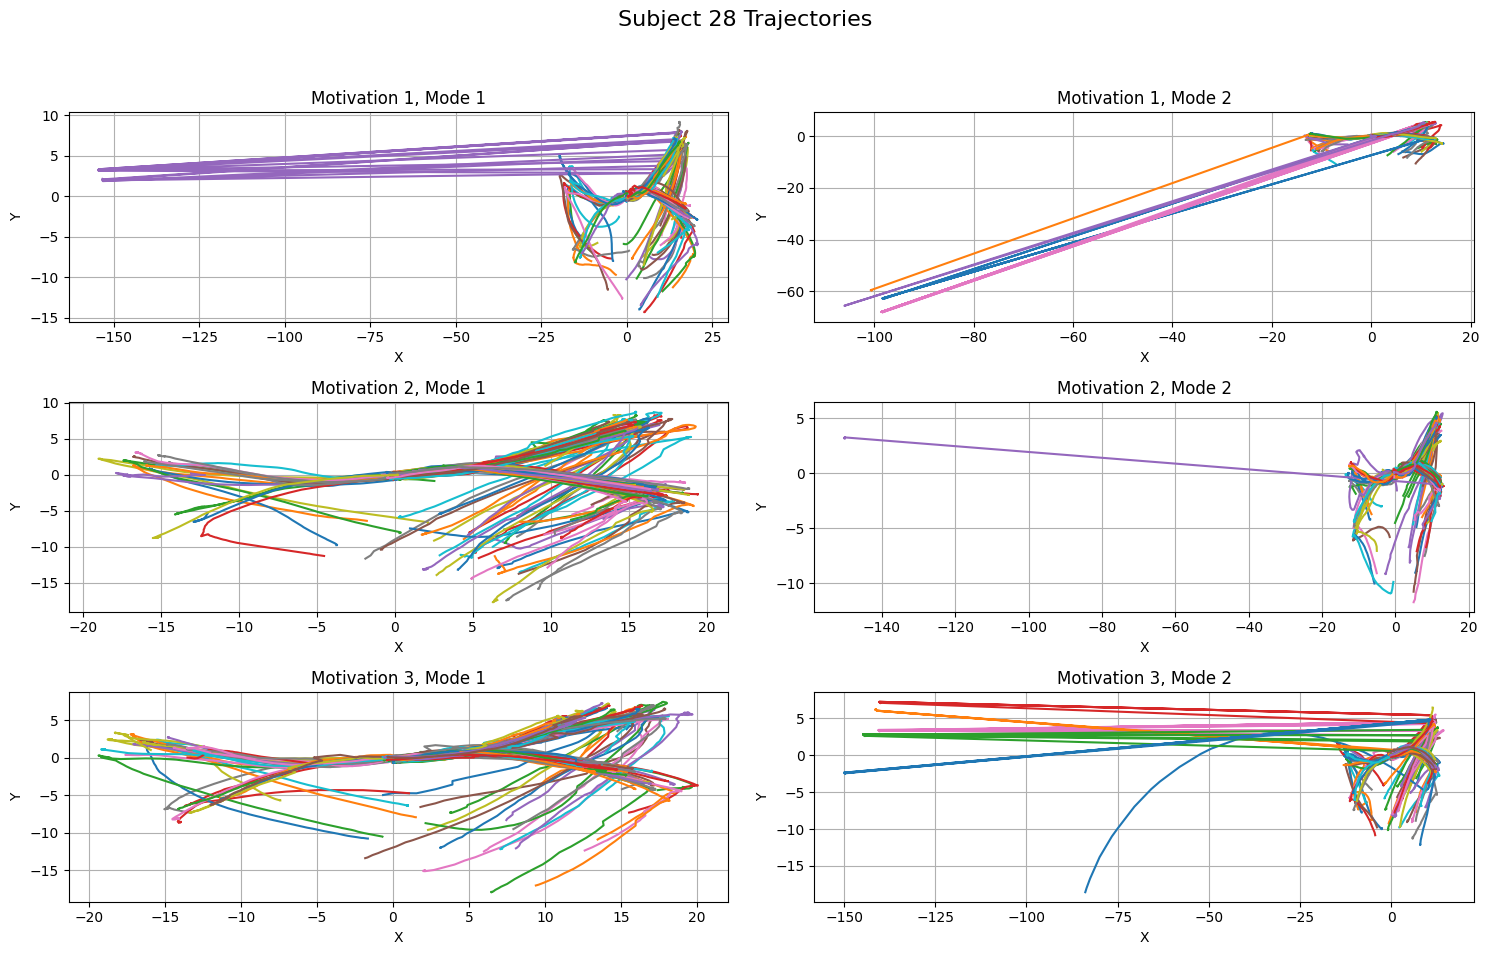

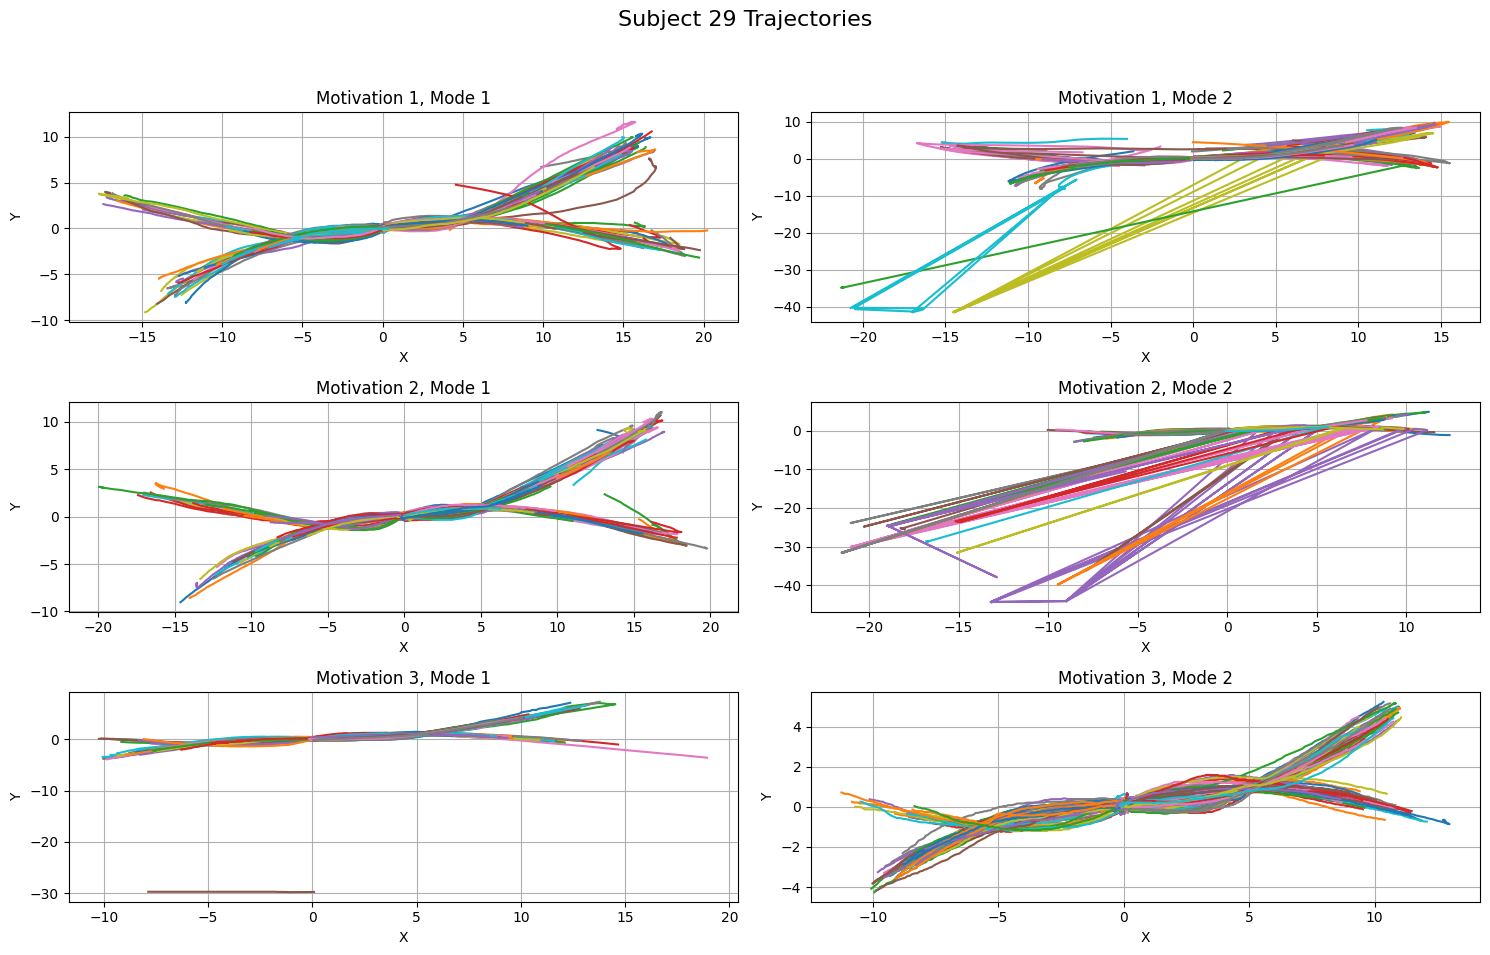

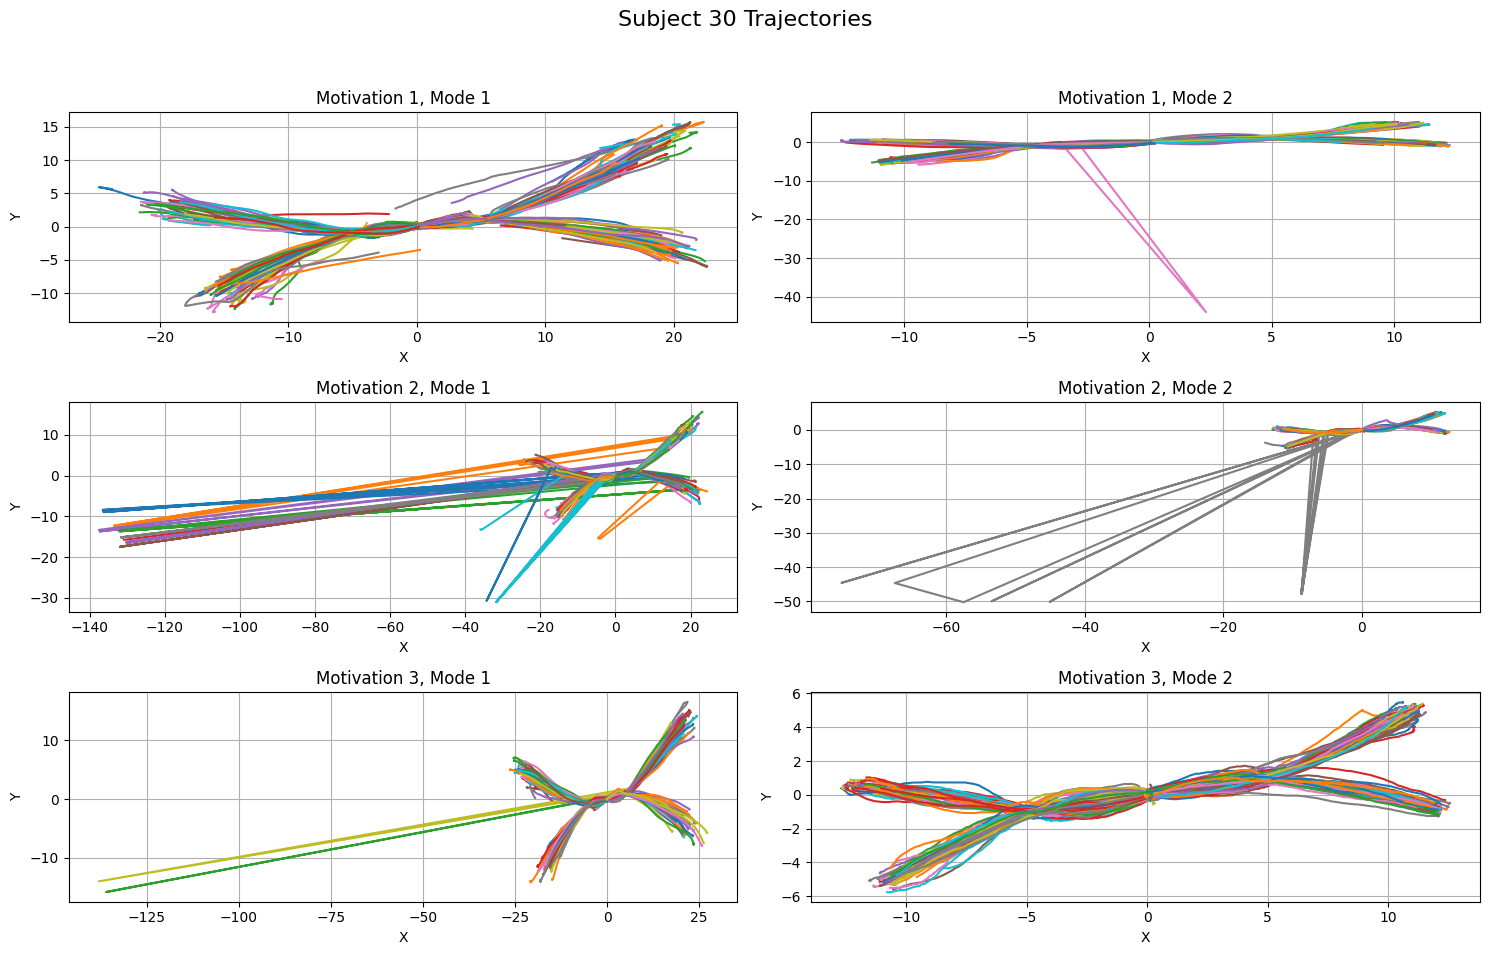

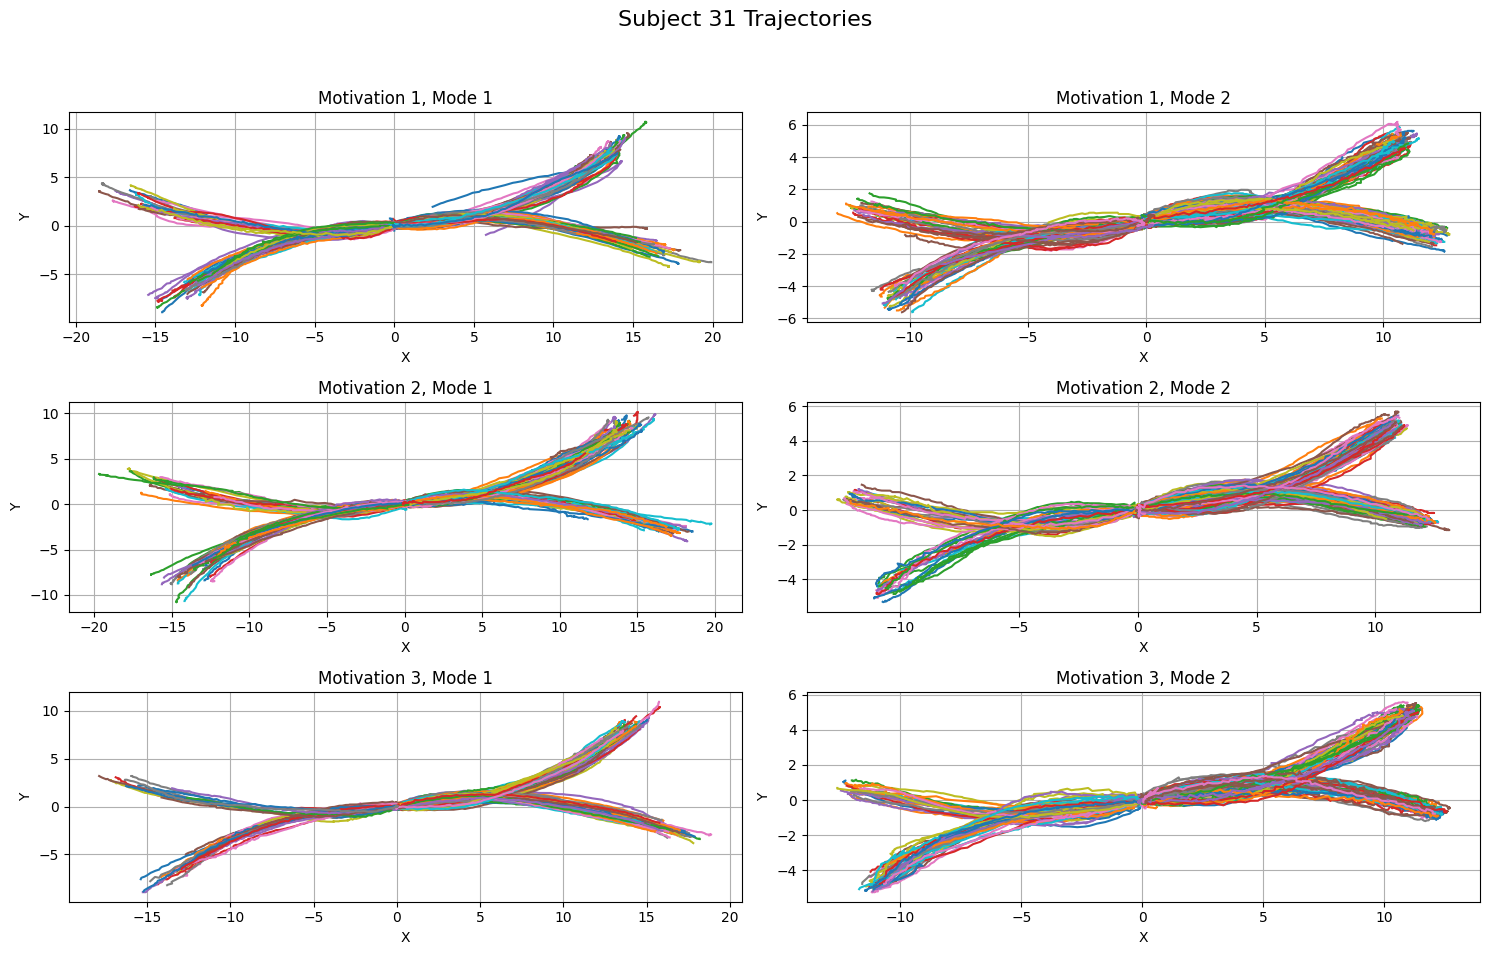

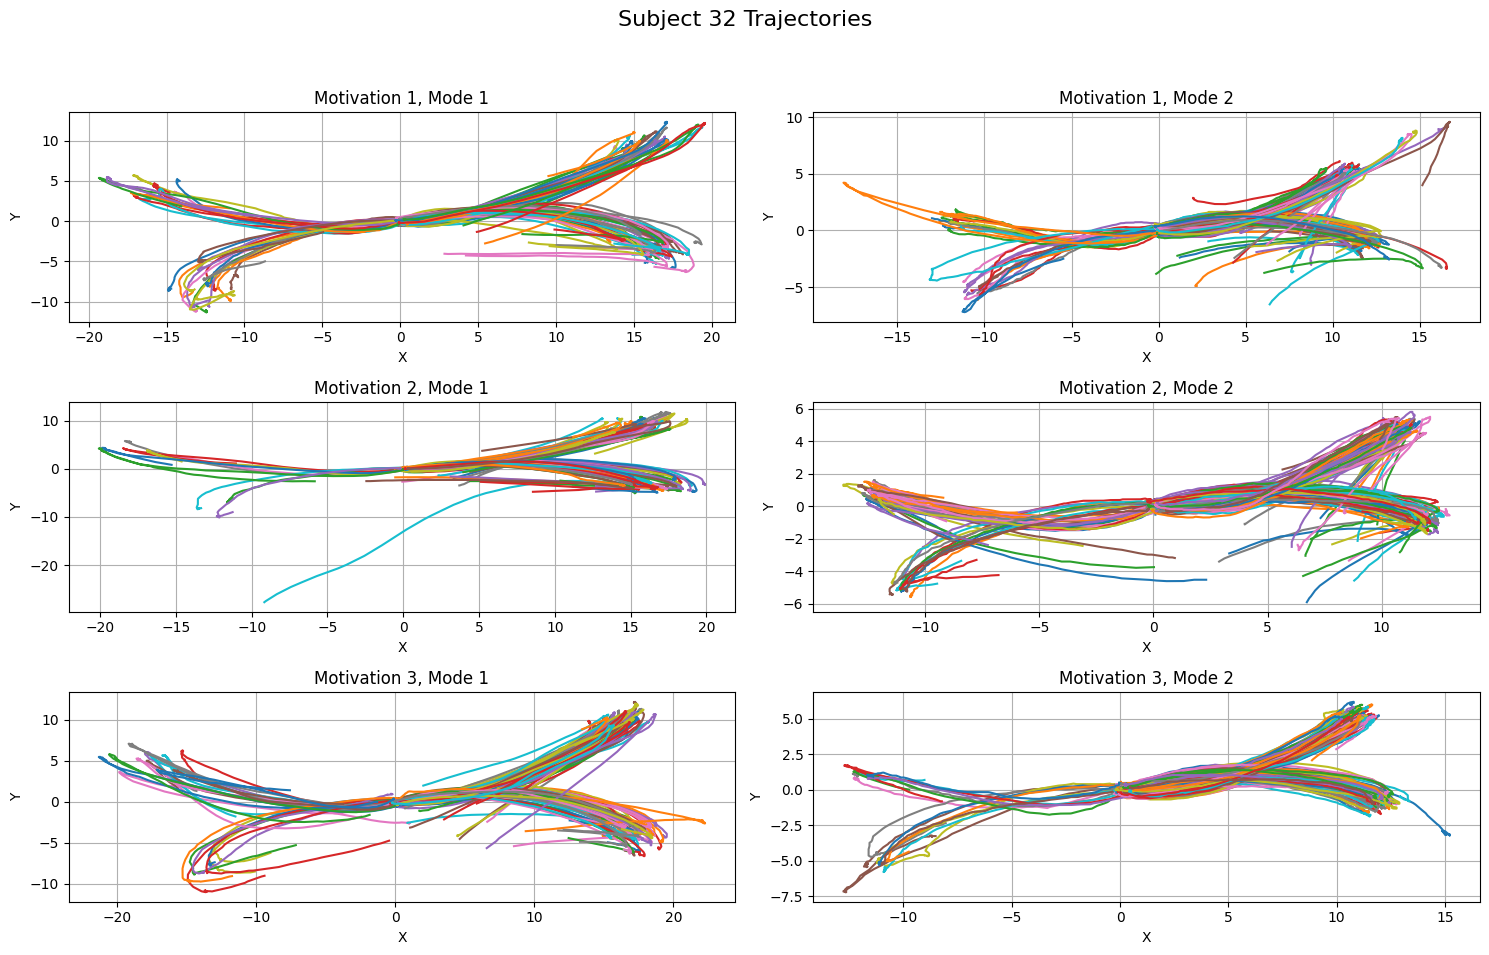

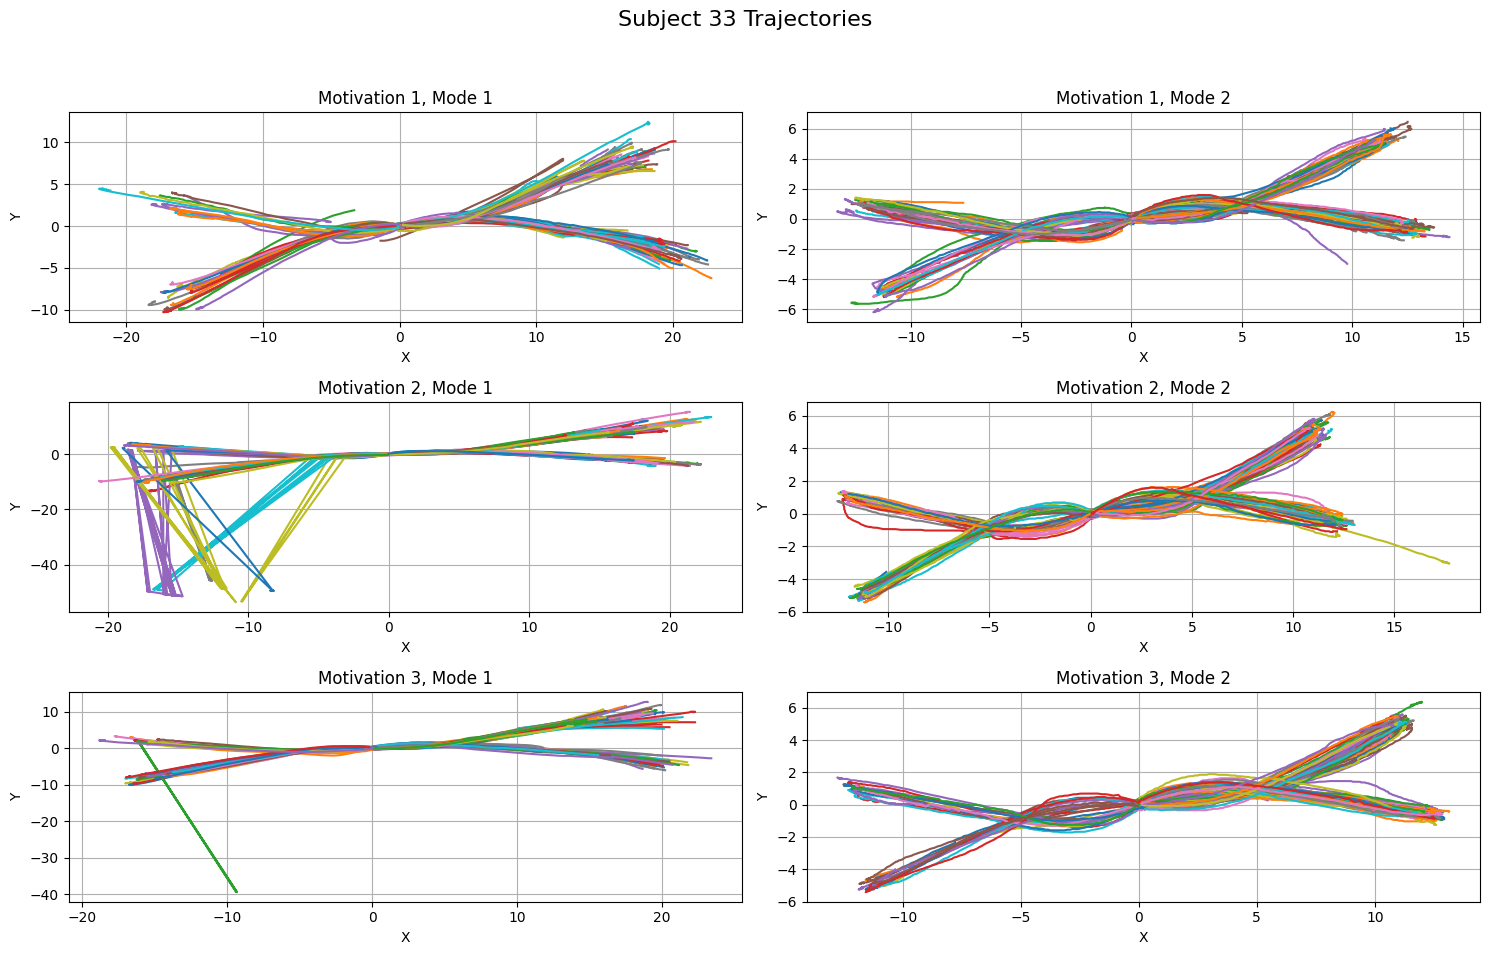

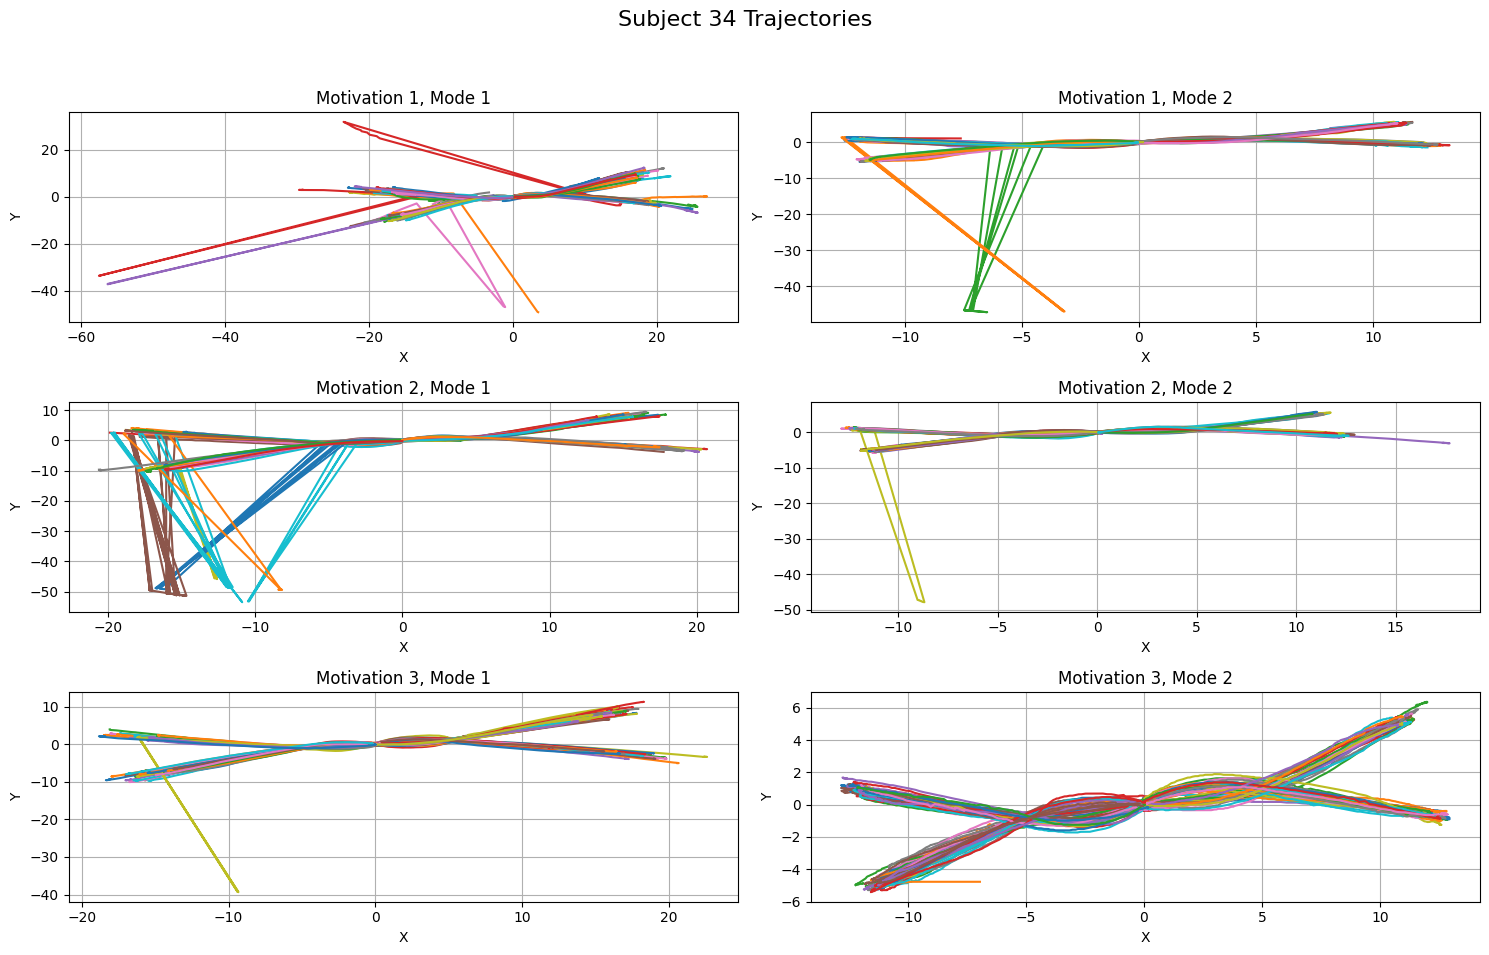

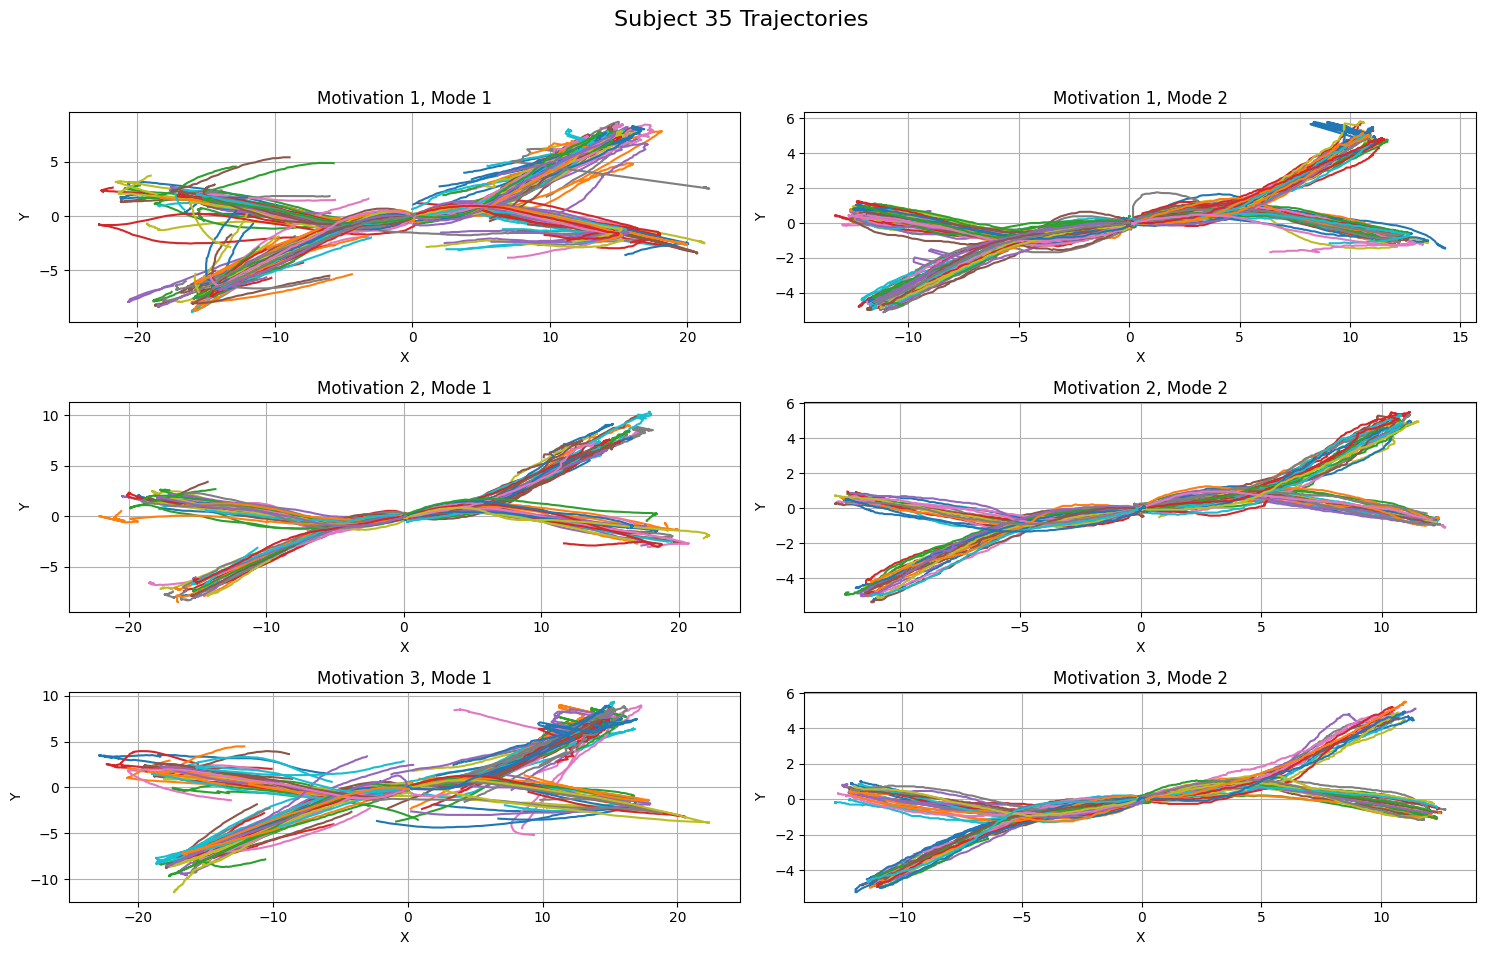

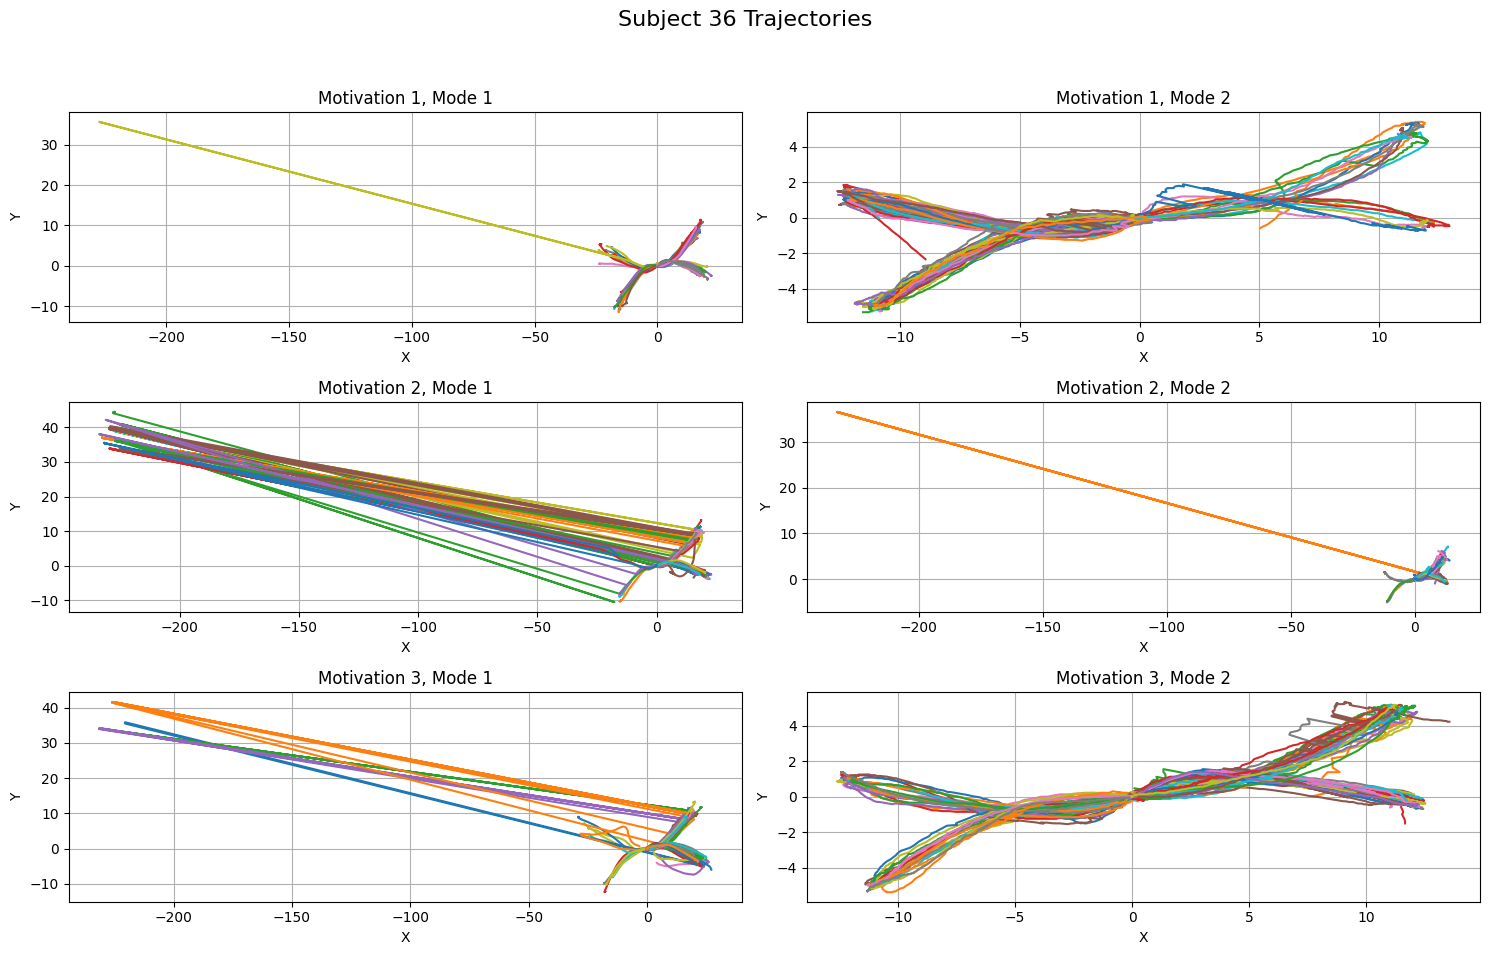

In [116]:
save_dir = 'subject_plots'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Loop over subjects
for subject in range(first_subj, last_subj): 
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns of subplots
    fig.suptitle(f'Subject {subject} Trajectories', fontsize=16)
    subplot_index = 0
    for motivation in range(1, 4):
        for mode in range(1, 3):
            ax = axes[subplot_index // 2, subplot_index % 2]
            key_x = f'dfx_{subject}_{motivation}{mode}'
            key_y = f'dfy_{subject}_{motivation}{mode}'
            pic_name = f'dataTrajectories-{subject}-M{motivation}-C{mode}'
            
            plot_data(
                data_dict[key_x], 
                data_dict[key_y], 
                cluster_labels=[],  
                cluster=None,     
                n_clusters=None,  
                plotting_target=False, 
                saving_plot=False, 
                pic_name=pic_name,
                ax=ax  # Pass the subplot axis to plot_data
            )
            ax.set_title(f'Motivation {motivation}, Mode {mode}')
            subplot_index += 1
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Save the figure
    save_path = os.path.join(save_dir, f'Subject_{subject}_Trajectories.png')
    plt.savefig(save_path)
    
    plt.show()

##### Loading the already processed and scaled data: 

In [139]:
scaled_data_dict, results_dict = load_processed_mult_data(folder_name='scaled_multiple_data') 

Loading the cleaned data...
CSV and idxrule JSON files have been loaded successfully.


### Fit the parameters

In [140]:
cluster = 2 #cluster 0,1 works
cluster_segment = 2
subject = 25
mode = 1
motivation = 1

dfx, dfy = get_cluster_data(scaled_data_dict, subject, motivation, mode, cluster)
idxrule = get_cluster_idxrule(idxrule_dict, subject, motivation, mode, cluster)
results_dict = get_cluster_idxrule(results_dict, subject, motivation, mode, cluster)

ValueError: Index rule for cluster 2 not found for subject 25 with motivation 1 and mode 1.

In [141]:
cluster_key_x = f'dfx_{subject}_{motivation}{mode}_cluster_{cluster}'
cluster_key_y = f'dfy_{subject}_{motivation}{mode}_cluster_{cluster}'
print(results_dict[subject].keys())

dict_keys(['25_11_cluster0', '25_11_cluster1', '25_11_cluster2', '25_11_cluster3', '25_12_cluster0', '25_12_cluster1', '25_12_cluster2', '25_12_cluster3', '25_21_cluster0', '25_21_cluster1', '25_21_cluster2', '25_21_cluster3', '25_22_cluster0', '25_22_cluster1', '25_22_cluster2', '25_22_cluster3', '25_31_cluster0', '25_31_cluster1', '25_31_cluster2', '25_31_cluster3', '25_32_cluster0', '25_32_cluster1', '25_32_cluster2', '25_32_cluster3'])


#### Loading the already processed data from files: 

In [3]:
#cleaned_data_dict = load_processed_mult_data(folder_name='clustered_multiple_data')
cleaned_data_dict, idxrule_dict = load_processed_mult_data(folder_name='clustered_multiple_data')

Loading the cleaned data...
CSV and idxrule JSON files have been loaded successfully.


In [21]:
cluster_points = [
    (10.5, 4.85),   # pt2
    (-11, -5),       # pt3  
    (10.5, 0),      # pt1    
    (-10.5, 1.25)  # pt0
]
n_clusters = 4
segments = point_to_segment(cluster_points, n_clusters)

In [111]:
scaled_data_dict, velocity_dict, results_dict = multiple_linear_transf(cleaned_data_dict, idxrule_dict, 
                            segments, 
                            first_subj = 25, last_subj = 37,
                            n_clusters = 4,
                            saving = True, 
                            save_dir = 'subject_plots_2')

Rotating and scaling the trajectories for subject  25
Rotating and scaling the trajectories for subject  26
Rotating and scaling the trajectories for subject  27
Rotating and scaling the trajectories for subject  28
Rotating and scaling the trajectories for subject  29
Rotating and scaling the trajectories for subject  30
Rotating and scaling the trajectories for subject  31
Rotating and scaling the trajectories for subject  32
Rotating and scaling the trajectories for subject  33
Rotating and scaling the trajectories for subject  34
Rotating and scaling the trajectories for subject  35
Rotating and scaling the trajectories for subject  36


In [112]:
saving_processed_mult_data(cleaned_data_dict = scaled_data_dict, 
                               folder_name = 'scaled_multiple_data')

Saving the cleaned data...
CSV and/or idxrule JSON files have been saved successfully.


In [119]:
saving_processed_mult_data(cleaned_data_dict = velocity_dict, 
                               folder_name = 'velocity')

Saving the cleaned data...
CSV and/or idxrule JSON files have been saved successfully.


In [126]:
saving_processed_mult_data_(idxrule_dict = results_dict, 
                               folder_name = 'velocity_T')

Saving the cleaned data...
CSV and/or idxrule JSON files have been saved successfully.


## Proves

In [130]:
print(scaled_data_dict.keys())
print(scaled_data_dict[25].keys())
print(len(scaled_data_dict[25].keys()))

print(results_dict.keys())
print(results_dict[25].keys())
print(len(results_dict[25].keys()))

dict_keys([25, 31, 36, 30, 29, 27, 26, 28, 35, 32, 33, 34])
dict_keys(['dfy_25_21_cluster1', 'dfx_25_31_cluster1', 'dfx_25_12_cluster2', 'dfx_25_12_cluster3', 'dfx_25_31_cluster0', 'dfy_25_21_cluster0', 'dfy_25_21_cluster2', 'dfx_25_31_cluster2', 'dfx_25_12_cluster1', 'dfx_25_12_cluster0', 'dfx_25_31_cluster3', 'dfy_25_21_cluster3', 'dfy_25_11_cluster2', 'dfy_25_32_cluster1', 'dfx_25_22_cluster1', 'dfx_25_22_cluster0', 'dfy_25_32_cluster0', 'dfy_25_11_cluster3', 'dfy_25_11_cluster1', 'dfy_25_32_cluster2', 'dfx_25_22_cluster2', 'dfx_25_22_cluster3', 'dfy_25_32_cluster3', 'dfy_25_11_cluster0', 'dfy_25_22_cluster0', 'dfx_25_11_cluster3', 'dfx_25_32_cluster0', 'dfx_25_32_cluster1', 'dfx_25_11_cluster2', 'dfy_25_22_cluster1', 'dfy_25_22_cluster3', 'dfx_25_11_cluster0', 'dfx_25_32_cluster3', 'dfx_25_32_cluster2', 'dfx_25_11_cluster1', 'dfy_25_22_cluster2', 'dfy_25_31_cluster0', 'dfy_25_12_cluster3', 'dfx_25_21_cluster0', 'dfx_25_21_cluster1', 'dfy_25_12_cluster2', 'dfy_25_31_cluster1', 'dfy_

In [120]:
print(type(results_dict[25]))
print(type(results_dict[25]['25_11_cluster0']))

<class 'dict'>
<class 'numpy.ndarray'>


In [10]:
cluster_points = [
    (10.5, 4.85),   # pt2
    (-11, -5),       # pt3  
    (10.5, 0),      # pt1    
    (-10.5, 1.25)  # pt0
]
n_clusters = 4
segments = point_to_segment(cluster_points, n_clusters)

In [42]:
velocity_dict = {}
results_dict = {}

cluster = 2 #cluster 0,1 works
cluster_segment = 2
subject = 25
mode = 1
motivation = 1

dfx, dfy = get_cluster_data(cleaned_data_dict, subject, motivation, mode, cluster)
idxrule = get_cluster_idxrule(idxrule_dict, subject, motivation, mode, cluster)
key_ = f'{subject}_{motivation}{mode}_cluster{cluster}'
                    

dfx_, dfy_ = linear_transf(dfx, dfy, segments[cluster_segment][0], segments[cluster_segment][1])

dfv = experimental_velocity(dfx_, dfy_)
mean_idxrule = sum(idxrule) / len(idxrule)
T = mean_idxrule / 1000
vel=dfv[cluster].T.max().mean()

(array([0, 0, 0, 0]), array([0, 0, 0, 0]))

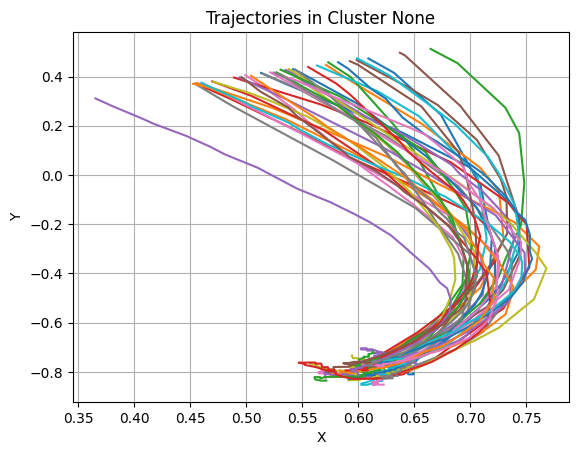

In [43]:
plot_data(dfx_, dfy_, cluster_labels=[],  
                    cluster=None,     
                    n_clusters=None,  
                    plotting_target=False, 
                    saving_plot=False)

In [45]:
print(segments[cluster_segment])
print(segments[3])

((11.5, 1.75), (9.5, -1.75))
((-11.5, -0.5), (-9.5, 3.0))


(array([0, 0, 0, 0]), array([0, 0, 0, 0]))

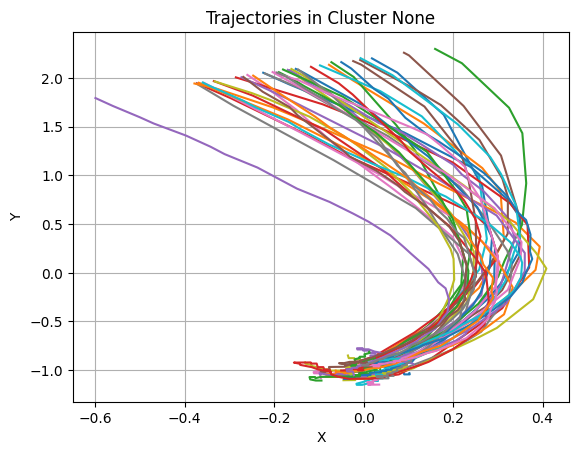

In [86]:
cluster = 2 #cluster 0 works
subject = 25
mode = 1
motivation = 1
dfx, dfy = get_cluster_data(cleaned_data_dict, subject, motivation, mode, cluster)
idxrule = get_cluster_idxrule(idxrule_dict, subject, motivation, mode, cluster)
dfx_, dfy_ = linear_transf_(dfx, dfy, segments[cluster][0], segments[cluster][1])
plot_data(dfx_, dfy_, cluster_labels=[],  
                    cluster=None,     
                    n_clusters=None,  
                    plotting_target=False, 
                    saving_plot=False)


(array([0, 0, 0, 0]), array([0, 0, 0, 0]))

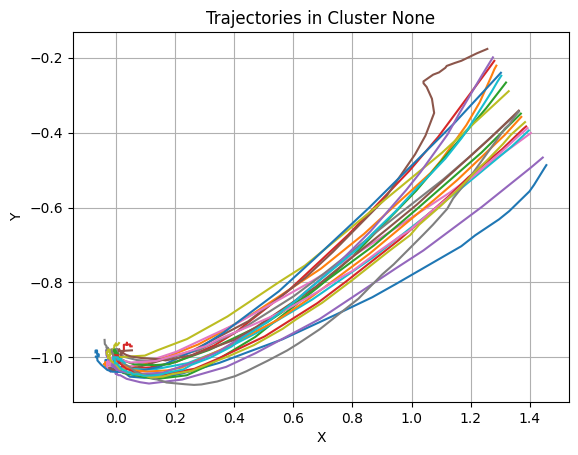

In [80]:
cluster = 1 #cluster 0 works
subject = 25
mode = 1
motivation = 1
dfx, dfy = get_cluster_data(cleaned_data_dict, subject, motivation, mode, cluster)
idxrule = get_cluster_idxrule(idxrule_dict, subject, motivation, mode, cluster)
dfx_, dfy_ = linear_transf_(dfx, dfy, segments[cluster][0], segments[cluster][1])
plot_data(dfx_, dfy_, cluster_labels=[],  
                    cluster=None,     
                    n_clusters=None,  
                    plotting_target=False, 
                    saving_plot=False)

(array([0, 0, 0, 0]), array([0, 0, 0, 0]))

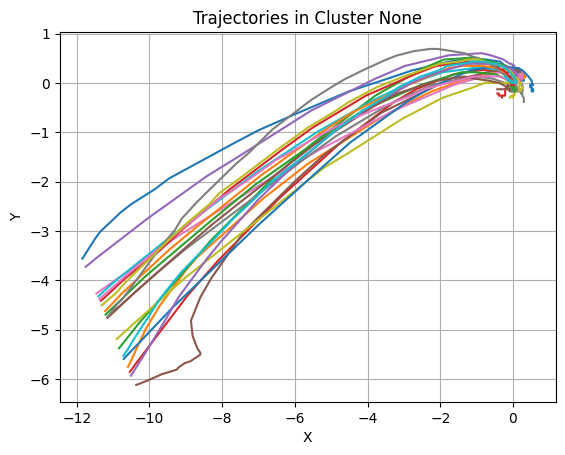

In [81]:
plot_data(dfx, dfy, cluster_labels=[],  
                    cluster=None,     
                    n_clusters=None,  
                    plotting_target=False, 
                    saving_plot=False)

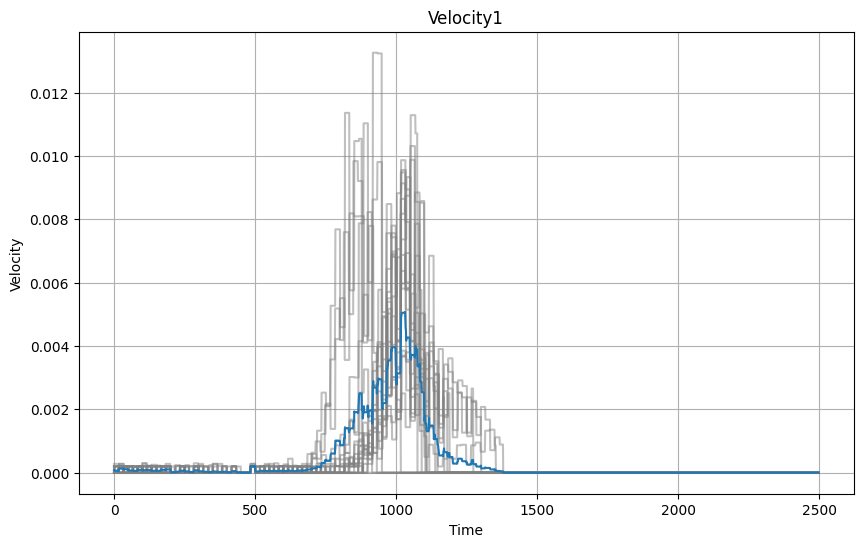

In [13]:
dfv = experimental_velocity(dfx_, dfy_)
plot_velocity(dfv, saving_plot = False, pic_name = 'Velocity{}'.format(cluster))

In [17]:
mean_idxrule = sum(idxrule) / len(idxrule)
T = mean_idxrule / 1000
vel=dfv[cluster].T.max().mean()
Tvel = np.array([vel, T])
print((vel, T))
print(type((vel, T)))
print(type(Tvel))

(0.0002793757911149548, 1.1229)
<class 'tuple'>
<class 'numpy.ndarray'>


### Clustering the data

We can cluster directly the trajectories within the `cleaning_data` function, since we are checking for intersection with each target segment. Hence we can idenfity whenever the trajectory crosses each segment as a mean to cluster them in the 4 classes needed. Then we can reproduce the approach in order to fit the paramaters for each case. Then, the approach to follow is: 
1. Modify the `cleaning_data` so it also clusters the data within the 4 clusters. 
2. Iterate the process followed for one subject for each trajectory class to get a set of parameters. 



## Functions

### Function for main: 

#### Loading data...

In [123]:
import os
import json
import pandas as pd
import numpy as np

def saving_processed_mult_data_(cleaned_data_dict: dict = None, idxrule_dict: dict = None, 
                               folder_name: str = 'cleaned_multiple_data') -> None:
    
    if cleaned_data_dict is None and idxrule_dict is None:
        print("No data to save.")
        return
    
    print('Saving the cleaned data...')
    
    # Get the current directory
    current_dir = os.getcwd()
    
    # Navigate one step up (to the parent directory)
    parent_dir = os.path.dirname(current_dir)
    
    # Enter the 'data' folder
    data_folder = os.path.join(parent_dir, folder_name)
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
        
    if cleaned_data_dict is not None:
        for subject, subject_data in cleaned_data_dict.items():
            subject_folder = os.path.join(data_folder, f'subject_{subject}')
            if not os.path.exists(subject_folder):
                os.makedirs(subject_folder)
            
            for key, df in subject_data.items():
                # Define the file path for the DataFrame
                file_path = os.path.join(subject_folder, f"{key}.csv")
                
                # Save the DataFrame to a CSV file
                df.to_csv(file_path, index=False)
        
    if idxrule_dict is not None:
        for subject, idxrules in idxrule_dict.items():
            subject_folder = os.path.join(data_folder, f'subject_{subject}')
            if not os.path.exists(subject_folder):
                os.makedirs(subject_folder)
            
            # Save the idxrule_dict for the subject
            idxrule_path = os.path.join(subject_folder, f"idxrule_{subject}.json")
            
            # Convert np.array objects to lists before saving to JSON
            idxrules_list = {key: value.tolist() for key, value in idxrules.items()}
            
            with open(idxrule_path, 'w') as f:
                json.dump(idxrules_list, f)
        
    print("CSV and/or idxrule JSON files have been saved successfully.")


#### Clustering while cleaning data

In [6]:
import pandas as pd
from typing import List, Tuple, Dict

def on_segment(p, r, s, tol = 1e-3) -> bool:
    x_max = max(r[0], s[0])
    x_min = min(r[0], s[0])
    y_max = max(r[1], s[1])
    y_min = min(r[1], s[1])
    if (p[0] <= x_max and p[0] >= x_min and 
        p[1] <= y_max and p[1] >= y_min and 
        (p[0] - r[0]) / (p[1] - r[1] ) - (s[0] - r[0]) / (s[1] - r[1]) < tol ):
            return True
    return False


def cleaning_multiple_data_(dfx: pd.DataFrame, dfy: pd.DataFrame, 
                           segments: List[Tuple[Tuple[float, float], Tuple[float, float]]]) -> Dict[str, Tuple[pd.DataFrame, pd.DataFrame]]:
    
    print('Dataset shape before cleaning:')
    print(dfx.shape)
    
    # Dictionary to hold dataframes for each segment
    segment_data = {f'segment_{i}': (pd.DataFrame(columns=dfx.columns), pd.DataFrame(columns=dfy.columns)) for i in range(len(segments))}
    idxrules = {f'segment_{i}': [] for i in range(len(segments))}
    
    for dx in dfx.index:
        segment_index = None  # Initialize segment index
        t_intersect = None  # Initialize t_intersect
        for t in range(len(dfx.columns) - 1):
            p = (dfx.loc[dx, dfx.columns[t]], dfy.loc[dx, dfx.columns[t]])
            for i, (r, s) in enumerate(segments):
                if on_segment(p, r, s):
                    # If intersects, keep trajectory up to the intersecting point
                    t_intersect = t + 1
                    segment_index = i
                    dfx.loc[dx, dfx.columns[t_intersect:]] = p[0]
                    dfy.loc[dx, dfy.columns[t_intersect:]] = p[1]
                    # And we stop looking for the intersection
                    break
            if t_intersect is not None:
                break
        
        if t_intersect is not None:
            # Add the trajectory to the corresponding segment's dataframe
            segment_data[f'segment_{segment_index}'][0].loc[dx] = dfx.loc[dx]
            segment_data[f'segment_{segment_index}'][1].loc[dx] = dfy.loc[dx]
            idxrules[f'segment_{segment_index}'].append(t_intersect)
        else:
            # No intersection found, drop the row
            dfx = dfx.drop(axis=0, index=dx)
            dfy = dfy.drop(axis=0, index=dx)
    
    # Drop trajectories that exceed the specified bounds
    index1 = dfy[(dfy < -10).any(axis=1)].index
    index2 = dfx[(dfx < -15).any(axis=1)].index
    index3 = dfx[(dfx > 15).any(axis=1)].index
    index4 = dfx[(dfy > 10).any(axis=1)].index
    index0 = index1.union(index2)
    index01 = index0.union(index3)
    index = index01.union(index4)
    
    for key in segment_data.keys():
        segment_dfx, segment_dfy = segment_data[key]
        segment_dfx = segment_dfx.drop(axis=0, index=index, errors='ignore')
        segment_dfy = segment_dfy.drop(axis=0, index=index, errors='ignore')
        segment_dfx.reset_index(drop=True, inplace=True)
        segment_dfy.reset_index(drop=True, inplace=True)
        segment_data[key] = (segment_dfx, segment_dfy)
    
    print('Dataset shape after cleaning:')
    for key in segment_data.keys():
        print(f'{key} shape: {segment_data[key][0].shape}')
    
    return segment_data, idxrules


In [16]:
def cleaning_clustering_data(dfx : pd.DataFrame, dfy : pd.DataFrame, 
                  segments: List[Tuple[Tuple[float, float], Tuple[float, float]]], 
                  printing = False) -> Tuple[pd.DataFrame, pd.DataFrame, list]: 
    
    print('Dataset shape before cleaning:')
    print(dfx.shape)
    
    # Dictionary to hold dataframes for each segment
    segment_data = {i: (pd.DataFrame(columns=dfx.columns), pd.DataFrame(columns=dfy.columns)) for i in range(len(segments))}
    idxrules = {i: [] for i in range(len(segments))}
    
    for dx in dfx.index:
        segment_index = None  # Initialize segment index
        t_intersect = None  # Initialize t_intersect
        for t in range(len(dfx.columns) - 1):
            p = (dfx.loc[dx, dfx.columns[t]], dfy.loc[dx, dfx.columns[t]])
            for i, (r, s) in enumerate(segments):
                if on_segment(p, r, s):
                    # If intersects, keep trajectory up to the intersecting point
                    t_intersect = t + 1
                    segment_index = i
                    dfx.loc[dx, dfx.columns[t_intersect:]] = p[0]
                    dfy.loc[dx, dfy.columns[t_intersect:]] = p[1]
                    # And we stop looking for the intersection
                    break
            if t_intersect is not None:
                break
        
        if t_intersect is not None:
            # Add the trajectory to the corresponding segment's dataframe
            segment_data[segment_index][0].loc[dx] = dfx.loc[dx]
            segment_data[segment_index][1].loc[dx] = dfy.loc[dx]
            idxrules[segment_index].append(t_intersect)
        else:
            # No intersection found, drop the row
            dfx = dfx.drop(axis=0, index=dx)
            dfy = dfy.drop(axis=0, index=dx)
    
    # Drop trajectories that exceed the specified bounds
    index1 = dfy[(dfy < -10).any(axis=1)].index
    index2 = dfx[(dfx < -15).any(axis=1)].index
    index3 = dfx[(dfx > 15).any(axis=1)].index
    index4 = dfx[(dfy > 10).any(axis=1)].index
    index0 = index1.union(index2)
    index01 = index0.union(index3)
    index = index01.union(index4)
    
    for key in segment_data.keys():
        segment_dfx, segment_dfy = segment_data[key]
        segment_dfx = segment_dfx.drop(axis=0, index=index, errors='ignore')
        segment_dfy = segment_dfy.drop(axis=0, index=index, errors='ignore')
        segment_dfx.reset_index(drop=True, inplace=True)
        segment_dfy.reset_index(drop=True, inplace=True)
        segment_data[key] = (segment_dfx, segment_dfy)
    
    if printing:
        print('Dataset shape after cleaning:')
        for key in segment_data.keys():
            print(f'{key} shape: {segment_data[key][0].shape}')
        
    return segment_data, idxrules


def cleaning_clustering_multiple_data(data_dict: dict, 
                                      segments: List[Tuple[Tuple[float, float], Tuple[float, float]]], 
                                      first_subj: int = 25, last_subj: int = 37,
                                      save_dir: str = 'subject_plots') -> Tuple[Dict[int, Dict[str, pd.DataFrame]], Dict[int, Dict[str, List[int]]]]:
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    cleaned_data_dict = {}
    idxrule_dict = {}

    # Loop over subjects
    for subject in range(first_subj, last_subj):
        fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns of subplots
        fig.suptitle(f'Subject {subject} Clustered Trajectories', fontsize=16)
        subplot_index = 0
        
        colors = ['r', 'g', 'b', 'c']  # Add more colors if needed
        #markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd']  # Add more markers if needed
        
        for motivation in range(1, 4):
            for mode in range(1, 3):
                
                ax = axes[subplot_index // 2, subplot_index % 2]
                key_x = f'dfx_{subject}_{motivation}{mode}'
                key_y = f'dfy_{subject}_{motivation}{mode}'
                pic_name = f'Cleaned Trajectories-{subject}-M{motivation}-C{mode}'
                
                print('Cleaning and clustering subject data...', pic_name)
                df, idxrule = cleaning_clustering_data(data_dict[key_x], data_dict[key_y], segments)
                
                # Initialize the dictionaries if not already
                if subject not in cleaned_data_dict:
                    cleaned_data_dict[subject] = {}
                if subject not in idxrule_dict:
                    idxrule_dict[subject] = {}
                
                # Store the datasets in the dictionary
                for cluster, (dfx, dfy) in df.items():
                    cluster_key_x = f'{key_x}_cluster_{cluster}'
                    cluster_key_y = f'{key_y}_cluster_{cluster}'
                    cleaned_data_dict[subject][cluster_key_x] = dfx
                    cleaned_data_dict[subject][cluster_key_y] = dfy
                    idxrule_dict[subject][cluster_key_x] = idxrule[cluster]
                    
                    # Plotting the data
                    color = colors[cluster % len(colors)]
                    #marker = markers[cluster % len(markers)]
                    for i in range(dfx.shape[0]):
                        ax.plot(dfx.iloc[i, :], dfy.iloc[i, :], color=color, linestyle='-', linewidth=1, markersize=2,
                                label=f'Cluster {cluster}' if i == 0 else "")
                        # Mark the intersection point
                        if idxrule[cluster]:
                            ax.plot(dfx.iloc[i, idxrule[cluster][i]], dfy.iloc[i, idxrule[cluster][i]], 'kx')
                
                subplot_index += 1
        
        fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
        plt.savefig(os.path.join(save_dir, f'Subject_{subject}_clustered_trajectories.png'))
        plt.close(fig)
    
    return cleaned_data_dict, idxrule_dict


In [21]:
def saving_processed_mult_data(cleaned_data_dict: dict, 
                               folder_name: str = 'cleaned_multiple_data') -> None:
    
    print('Saving the cleaned data...')
    
    # Get the current directory
    current_dir = os.getcwd()
    
    # Navigate one step up (to the parent directory)
    parent_dir = os.path.dirname(current_dir)
    
    # Enter the 'data' folder
    data_folder = os.path.join(parent_dir, folder_name)
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
        
    for subject, subject_data in cleaned_data_dict.items():
        subject_folder = os.path.join(data_folder, f'subject_{subject}')
        if not os.path.exists(subject_folder):
            os.makedirs(subject_folder)
        
        for key, df in subject_data.items():
            # Define the file path
            file_path = os.path.join(subject_folder, f"{key}.csv")
            
            # Save the DataFrame to a CSV file
            df.to_csv(file_path, index=False)
        
    print("CSV files have been saved successfully.")

In [23]:
def load_processed_mult_data(folder_name: str = 'cleaned_multiple_data') -> dict:
    print('Loading the cleaned data...')
    
    # Get the current directory
    current_dir = os.getcwd()
    
    # Navigate one step up (to the parent directory)
    parent_dir = os.path.dirname(current_dir)
    
    # Enter the 'data' folder
    data_folder = os.path.join(parent_dir, folder_name)
    
    # Check if the folder exists
    if not os.path.exists(data_folder):
        raise FileNotFoundError(f"The folder {data_folder} does not exist.")
        
    cleaned_data_dict = {}
    
    # Iterate through each subject's folder
    for subject_folder in os.listdir(data_folder):
        subject_path = os.path.join(data_folder, subject_folder)
        if os.path.isdir(subject_path):
            subject_key = int(subject_folder.split('_')[1])
            cleaned_data_dict[subject_key] = {}
            
            # Iterate through each CSV file in the subject's folder
            for file_name in os.listdir(subject_path):
                if file_name.endswith('.csv'):
                    file_path = os.path.join(subject_path, file_name)
                    df = pd.read_csv(file_path)
                    key = file_name.split('.csv')[0]
                    cleaned_data_dict[subject_key][key] = df
    
    print("CSV files have been loaded successfully.")
    return cleaned_data_dict

In [27]:
def get_cluster_data(cleaned_data_dict, subject, motivation, mode, cluster):
    cluster_key_x = f'dfx_{subject}_{motivation}{mode}_cluster_{cluster}'
    cluster_key_y = f'dfy_{subject}_{motivation}{mode}_cluster_{cluster}'
    
    if subject in cleaned_data_dict:
        subject_data = cleaned_data_dict[subject]
        if cluster_key_x in subject_data and cluster_key_y in subject_data:
            dfx = subject_data[cluster_key_x]
            dfy = subject_data[cluster_key_y]
            return dfx, dfy
        else:
            raise ValueError(f"Cluster {cluster} not found for subject {subject} with motivation {motivation} and mode {mode}.")
    else:
        raise ValueError(f"Subject {subject} not found in the dataset.")



### Advanced processing generalization

In [136]:
from typing import Tuple, List, Dict

def multiple_linear_transf_(cleaned_data_dict: dict, idxrule_dict: dict, 
                            segments: List[Tuple[Tuple[float, float], Tuple[float, float]]], 
                            first_subj: int = 25, last_subj: int = 37,
                            n_clusters = 4,
                            saving = True, 
                            save_dir: str = 'subject_plots'): 
    
    velocity_dict = {}
    results_dict = {}
    scaled_data_dict = {}
    
    for subject in range(first_subj, last_subj):
        print('Rotating and scaling the trajectories for subject ', subject )
        fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns of subplots
        fig.suptitle(f'Subject {subject} Rotated Trajectories', fontsize=16)
        subplot_index = 0
        pic_name = f'Scaled Trajectories-{subject}'

        colors = ['r', 'g', 'b', 'c']
        
        for motivation in range(1, 4):
            
            for mode in range(1, 3):
                ax = axes[subplot_index // 2, subplot_index % 2]
                
                for cluster in range(n_clusters):
                    key_ = f'{subject}_{motivation}{mode}_cluster_{cluster}'
                    key_x = f'dfx_{subject}_{motivation}{mode}_cluster_{cluster}'
                    key_y = f'dfy_{subject}_{motivation}{mode}_cluster_{cluster}'
                
                    dfx, dfy = get_cluster_data(cleaned_data_dict, subject, motivation, mode, cluster)
                    idxrule = get_cluster_idxrule(idxrule_dict, subject, motivation, mode, cluster)
                    
                    dfx_, dfy_ = linear_transf_(dfx, dfy, segments[cluster][0], segments[cluster][1])
                    dfv = experimental_velocity(dfx_, dfy_)
                    
                    if len(idxrule) > 0:
                        mean_idxrule = sum(idxrule) / len(idxrule)
                    else: 
                        mean_idxrule = 0
                        
                    T = mean_idxrule / 1000
                    vel=dfv.T.max().mean()
                    
                    # Initialize the dictionaries if not already
                    if subject not in velocity_dict:
                        velocity_dict[subject] = {}
                    if subject not in results_dict:
                        results_dict[subject] = {}
                    if subject not in scaled_data_dict:
                        scaled_data_dict[subject] = {}
                        
                    velocity_dict[subject][key_] = dfv
                    results_dict[subject][key_] = np.array([ T, vel ])
                    scaled_data_dict[subject][key_x] = dfx_
                    scaled_data_dict[subject][key_y] = dfy_ 
                    
                    # Plotting the data
                    color = colors[cluster % len(colors)]
                    for i in range(dfx.shape[0]):
                        ax.plot(dfx_.iloc[i, :], dfy_.iloc[i, :], color=color, linestyle='-', linewidth=1, markersize=2,
                                label=f'Cluster {cluster}' if i == 0 else "")
                        
                subplot_index += 1
                
        fig.tight_layout(rect=[0, 0, 1, 0.96])  
        
        if saving:
            plt.savefig(os.path.join(save_dir, pic_name))
        
        plt.close(fig)

    return scaled_data_dict, velocity_dict, results_dict 

In [99]:
print(segments[0])
print(segments[1])
print(segments[cluster_segment])
print(segments[3])


((9.5, 6.6), (11.5, 3.0999999999999996))
((-10, -6.75), (-12, -3.25))
((11.5, 1.75), (9.5, -1.75))
((-11.5, -0.5), (-9.5, 3.0))


In [104]:
import math

def linear_transf_(dfx : pd.DataFrame, dfy : pd.DataFrame, 
                  rectx : np.ndarray, recty : np.ndarray) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    
    if rectx[0] > 0 and recty[-1] > 0:
        model_target = np.array((0.5,1))
        screen_target = np.array(((rectx[1]+rectx[0])/2,(recty[1]+recty[0])/2))
        model_origin = np.array((np.cos(-math.pi*12/24),np.sin(-math.pi*12/24))) 

    elif rectx[0] < 0 and recty[-1] > 0: 
        model_target = np.array((1.5,0))
        dfx = -1 * dfx
        screen_target = np.array(((-rectx[1]-rectx[0])/2,(recty[1]+recty[0])/2))
        model_origin = np.array((np.cos(-math.pi*12/24),np.sin(-math.pi*12/24))) 
        
    elif rectx[0] > 0 and recty[-1] < 0:
        model_target = np.array((1.5,0))
        dfy = -1 * dfy
        screen_target = np.array(((rectx[1]+rectx[0])/2,(-recty[1]-recty[0])/2)) 
        model_origin = np.array((np.cos(-math.pi*12/24),np.sin(-math.pi*12/24))) 
        
    else: 
        model_target = np.array((0.5,1))
        dfx = -1 * dfx
        dfy = -1 * dfy
        screen_target = np.array(((-rectx[1]-rectx[0])/2,(-recty[1]-recty[0])/2))
        model_origin = np.array((np.cos(-math.pi*12/24),np.sin(-math.pi*12/24))) 

        
    screen_origin = np.array((0,0))

    v_model=model_target-model_origin
    v_model_ort=np.array((v_model[1],-v_model[0]))

    v_screen=screen_target-screen_origin
    v_screen_ort=np.array((v_screen[1],-v_screen[0]))

    model_M=np.vstack((np.append(model_origin,1),np.append(model_target,1),np.append(v_model_ort,0))).T
    screen_M=np.vstack((np.append(screen_origin,1),np.append(screen_target,1),np.append(v_screen_ort,0))).T

    M=np.dot(model_M,np.linalg.inv(screen_M))
    A=M[:2,:2]
    b=M[:2,-1:].flatten()
    
    dfx_=A[0,0]*dfx+A[0,1]*dfy+b[0]
    dfy_=A[1,0]*dfx+A[1,1]*dfy+b[1]
    
    return dfx_, dfy_

In [ ]:
# Concatenate the data to rect_df

rect_df = pd.concat([rect_df, pd.DataFrame({'cluster': [cluster], 'rectx': [rectx], 'recty': [recty],
                                            'idxrule': [idxrule], 'mean_T': T, 'max_vel': vel})],
                                            ignore_index=True) 

In [131]:
         
def fitParamaters(dfx : list, dfy : list, 
                  idxrule: list, 
                  n_clusters = 4) -> Tuple[list, list]:
    
    new_params = [[] for _ in range(n_clusters)]
    opt_sigma = [[] for _ in range(n_clusters)]
    
    for cluster in range(n_clusters): 
        
        print('Computing trajectory with optimized velocity for cluser: ', cluster)
        
        ## Generate the optimal trajectory by optimizing the Functional in terms of the time T 
        x, y, T = generate_trajectory(plotting = False)
        plot_simulation(x, y, dfx[cluster], dfy[cluster], 
                    cluster = cluster, pic_name = 'Trajectories_optFunctional', 
                    saving_plot = True)
        
        ## Generate the optimal trajectory with the time provided from optimizing the Functional 
        # by optimizing the velocity in terms of the parameters (alpha, epsilon, gamma)
        x_, y_, new_params[cluster] = generate_trajectory_vel(plotting = False, 
                                 T = T,
                                 vel = results[results['cluster'] == cluster].max_vel.values[0])
        plot_simulation(x_, y_, dfx[cluster], dfy[cluster], 
                    cluster = cluster, pic_name = 'Trajectories_optVel', 
                    saving_plot = True)
        
        ## Generate the optimal trajectory with the optimum stopping time and parameters
        # by optimizing the Kolmogorov Sirnov estimate in terms of the sigma
            # Converting idxrule to array from string
        idxr = results[results['cluster'] == cluster].idxrule.values[0]
        idxrule = np.fromstring(idxr[1: -1], dtype = int, sep = ', ')
        
        x__, y__, opt_sigma[cluster] = optimize_Sigma(dfx[cluster] , dfy[cluster],
                                            idxrule = idxrule, 
                                            new_params = new_params[cluster])
        plot_simulation(x__, y__, dfx[cluster], dfy[cluster], 
                        cluster = cluster, pic_name = 'Trajectories_optSigma', 
                        saving_plot = True)
        
        print('Parameters estimated:')
        print(new_params[cluster].x, opt_sigma[cluster].x)
        
    return new_params, opt_sigma